# <span style="color:#e0bda8; font-size: 40px;">To Grant or Not to Grant</span>


# <span style="color:#e0bda8">0. Context</span>

The New York Workers’ Compensation Board (WCB) handles claims related to workplace injuries, a process that is often time-consuming when done manually. This project aims to develop a machine learning model to predict the "Claim Injury Type" based on historical claims data from 2020 to 2022. By automating this classification, we can help the WCB make quicker and more accurate decisions.

The project involves building and evaluating various multiclass classification models, optimizing their performance, and exploring key features that contribute to accurate predictions. Ultimately, the goal is to identify the best model that can efficiently assist in the decision-making process for new claims.


# <span style="color:#e0bda8">1. Import Packages and Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import os
import sqlite3
from itertools import product
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
import math
from datetime import datetime
from datetime import timedelta


# <span style="color:#e0bda8">2. Reading the Data</span>

In [2]:
df = pd.read_csv('train_data.csv')
df

C:\Users\pedro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <span style="color:#e0bda8">3. Metadata</span>
- **Accident Date** - Injury date of the claim.
- **Age at Injury** - Age of injured worker when the injury occured.
- **Alternative Dispute Resolution** - Adjudication processes external to the Board.
- **Assembly Date** - The date the claim was first assembled.
- **Attorney/Representative** - Is the claim being represented by an Attorney?
- **Average Weekly Wage** - The wage used to calculate workers' compensation, disability, or an Paid Leave wage replacement benefits.
- **Birth Year** - The reported year of birth of the injured worker.
- **C-2 Date** - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- **C-3 Date** - Date Form C-3 (Employee Claim Form) was received.
- **Carrier Name** - Name of primary insurance provider responsible for providing workers' compensation coverage to the injured worker's employer.
- **Carrier Type** - Type of primary insurance provider responsible for providing workers' compensation coverage.
- **Claim Identifier** - Unique identifier for each claim, assigned by WCB.
- **Count of Injury** - Name of the New York County where the injury occured.
- **COVID-19 Indicator** - Indication that the claim may be associated with COVID-19.
- **District Name** - Name of the WCB district office that oversees claims for that region or area of the state.
- **First Hearing Date** - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.
- **Gender** - The reported gender of the injured worker.
- **IME-4 Count** - Number of IME-4 forms received per claim. The IME-4 form is the "Independent Examiner's Report of Independent Medical Examination" form.
- **Industry Code** - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.
- **Industry Code Description** - 2-digit NAICS industry code description used to classify businesses according to their economic activity.
- **Medical Fee Region** - Approximate region where the injured worker would receive medical service.
- **OIICS Nature of Injury Description** - The OIICS nature of injury codes & descriptions are available at: https://www.bls.gov/iif/oiics_manual_2007.pdf.
- **WCIO Cause of Injury Code** - The WCIO cause of injury codes & descriptions are  at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.
- **WCIO Cause of Injury Description** - See description of field above.
- **WCIO Nature of Injury Code** - The WCIO nature of injury are available at
 https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.
- **WCIO Nature of Injury Description** - See description of field above.
- **WCIO Part Of Body Code** - The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.
- **WCIO Part Of Body Description** - See description of field above.
- **Zip Code** - The reported ZIP code of the injured worker’s home address.
- **Agreement Reached** - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.
- **WCB Decision** - Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.
- **Claim Injury Type** - Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.

# <span style="color:#e0bda8">4. Initial Analysis</span>

## What are some characteristics of our data?

In [3]:
df.shape

(593471, 33)

In [4]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [6]:
df['OIICS Nature of Injury Description'].value_counts(dropna=False)

NaN    593471
Name: OIICS Nature of Injury Description, dtype: int64

## Initial Data Insights

After importing the dataset and using the `info()` method, we gathered the following key insights:

### 1. Missing Values:
   Almost all columns in the dataset have missing values, except for:
- `Assembly Date`
- `Claim Identifier`

The variable `OIICS Nature of Injury Description` contains no non-null values, indicating that it is entirely missing across all entries in the dataset.


### 2. Potential Data Type Issues:
   - **Date Columns** (`Accident Date`, `Assembly Date`, `C-2 Date`, `C-3 Date`, `First Hearing Date`): These are currently stored as `object` types. They should be converted to `datetime` format for easier manipulation and analysis.
   - **COVID-19 Indicator** and **Attorney/Representative**: These are likely binary variables but are stored as `object` types. Converting them to categorical or binary (`0` and `1`) might be more appropriate.
   - **`Agreement Reached`**: Currently stored as `float64`. If this column represents a binary outcome (e.g., Yes/No), it should be converted to an integer or categorical type.

These insights suggest that the dataset will require thorough preprocessing, including handling missing values and correcting data types to more suitable formats.

In [7]:
df.describe(include = 'all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.0,NaN,NaN,NaN,42.11,14.26,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,593471,1096,2020-03-06,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.0,NaN,NaN,NaN,491.09,6092.92,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,NaN,NaN,NaN,1886.77,414.64,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574026,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations and Irregularities in Dataset

### 1. Missing Values
- The **OIICS Nature of Injury Description** column has no entries at all (`0.0 count`), indicating that this variable is entirely missing. This may require dropping the column from analysis or substituting it with an appropriate placeholder if needed.

### 2. Extreme Values in Numerical Columns
- **Average Weekly Wage**: The maximum value is **2,828,079**, which seems unusually high compared to the mean of **491.09**. This may indicate outliers or data entry errors.
- **Claim Identifier**: The mean is very high at **23,667,598.79** with a maximum value of **999,891,667.0**, which could suggest an issue with how these identifiers are generated or logged. This high variability may require further examination.

### 3. Unusual Values for Categorical Variables
- **Gender**: There are **4 unique values** for this column, which is unexpected if it typically only represents male and female. Investigating these unique values could be helpful.
- **WCB Decision**: The count indicates that every entry states “Not Work Related,” suggesting that this variable may not be functioning as expected, or it might require further investigation into why other categories are absent.

### 4. Variability in Date Columns
- Both **Accident Date** and **Assembly Date** have high unique counts (5539 and 1096, respectively), indicating diverse dates, but the frequency of specific dates (like `2020-03-01` for Accident Date) could suggest clustering or common reporting patterns.
- **C-3 Date** has significantly fewer non-null entries (187,245), indicating that not all claims have received this form, which may impact analysis regarding claims processing times.

### 5. Binary Variables with Low Variability
- **Agreement Reached** has a mean of **0.05**, indicating that only about 5% of claims result in an agreement without the involvement of WCB. This could signal a lack of diversity in outcomes.
- **COVID-19 Indicator** has a similar pattern, showing that the majority of claims do not appear to be related to COVID-19, which could skew insights if this factor is essential for analysis.

### 6. High Cardinality in Categorical Variables
- **Carrier Name** and **County of Injury** have a large number of unique values (2046 and 63, respectively). While this is expected in datasets with various providers and geographical locations, it may complicate analysis and visualization, leading to potential overfitting in models if not handled properly.

## Recommendations
- **Data Cleaning**: Consider dropping or filling in missing values for entirely missing columns. Outliers should be investigated to determine if they are legitimate data points or errors.
- **Examine Unique Values**: Review categorical columns with unexpected unique counts to understand their implications on your analysis.
- **Standardization**: Standardizing formats (e.g., for dates) and converting categorical variables into more manageable forms (e.g., one-hot encoding) may improve the analysis and modeling process.
- **Outlier Handling**: Use methods such as IQR or z-scores to identify and potentially treat outliers in numerical columns.

## Variance

In [8]:
df.var(numeric_only=True)

Age at Injury                         2.032459e+02
Average Weekly Wage                   3.712365e+07
Birth Year                            1.719300e+05
Claim Identifier                      1.164827e+16
IME-4 Count                           8.021942e+00
Industry Code                         3.858936e+02
OIICS Nature of Injury Description             NaN
WCIO Cause of Injury Code             6.694784e+02
WCIO Nature of Injury Code            4.931740e+02
WCIO Part Of Body Code                5.002353e+02
Agreement Reached                     4.448758e-02
Number of Dependents                  4.003206e+00
dtype: float64

## Insights from Variance Output of Numeric Variables

### 1. **High Variability in Key Variables**
- **Average Weekly Wage**: The variance of **37,123,650** suggests a significant disparity in wages among the claims. This indicates that while many claimants may earn a typical wage, there are outliers earning substantially higher amounts. This high variance could skew analyses related to compensation and benefits.
  
- **Claim Identifier**: With a variance of **1.164827e+16**, this suggests a large range of values. If this is truly an identifier, it should ideally have low variance, indicating a consistent format across entries. A high variance in claim identifiers may point to inconsistencies in data entry or generation processes.

### 2. **Moderate to Low Variability in Other Variables**
- **Age at Injury**: The variance of **203.25** indicates that most injured workers fall within a relatively similar age range, but with some variation. This could help identify demographic trends in workplace injuries.
  
- **IME-4 Count**: A variance of **8.02** suggests that the number of IME-4 forms received per claim does not vary widely, indicating that most claims are likely processed similarly in terms of medical evaluations.

- **Number of Dependents**: The variance of **4.00** shows some variability, suggesting that claims can vary in the number of dependents involved. This may affect benefit calculations and eligibility for support.

### 3. **Low Variance in Certain Injury Codes**
- **Industry Code**: The variance of **385.89** indicates diversity in industries but also suggests that many claims likely come from a core set of industries, which could be explored further in analysis.

- **WCIO Cause of Injury Code** and **WCIO Nature of Injury Code** have variances of **669.48** and **493.17**, respectively, suggesting a moderate amount of variability in the nature and causes of injuries, but still indicate some level of concentration in certain categories.

### 4. **Variable with No Variance**
- **OIICS Nature of Injury Description** has no entries (NaN), indicating a complete lack of data. This variable should either be addressed through data cleaning or removed from further analysis.

### 5. **Binary Variable Variance**
- **Agreement Reached** has a very low variance of **0.0445**, reflecting that the vast majority of claims do not result in an agreement without the involvement of WCB. This suggests that such outcomes are rare and may require special consideration in analyses.

## Recommendations
- **Investigate Outliers**: For variables with high variance, especially Average Weekly Wage, consider investigating outliers to determine if they represent legitimate data points or errors.
- **Data Validation**: Ensure that the Claim Identifier is being generated and recorded consistently across the dataset to prevent issues in further analyses.
- **Explore Demographics**: Utilize the Age at Injury variable to analyze trends related to age demographics in workplace injuries.
- **Consider Variable Removal**: If certain variables (like OIICS Nature of Injury Description) are consistently NaN, they may not be useful for analysis and should be considered for removal.



# <span style="color:#e0bda8">5. Data Preprocessing</span>

## Conversion of the dates in the dataframe to datetime

In [9]:
dates = ['Accident Date', 'Assembly Date', 'C-2 Date','C-3 Date', 'First Hearing Date' ]
for date in dates: 
    df[date] = pd.to_datetime(df[date])

## Duplicates

Remove duplicates if there are any:

In [10]:
df.duplicated().any() #there are no duplicates

False

## Missing Values

In [11]:
# Check number of missing values
df.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

The column: 'OIICS Nature of Injury Description' is missing all its values, so we drop it.

In [12]:
df['OIICS Nature of Injury Description'].isna().all()

True

In [13]:
df = df.drop('OIICS Nature of Injury Description', axis=1)

There's a lot of columns with the same number of missing values (19945) and none has less than that besides Assembly Date and Claim Identifier. Let's check if the 19945 missing values on all the remaining columns match. If they do, this means that there's no information on those patients so we should remove those rows.

In [14]:
no_district = df[df['District Name'].isna()] #example of column with 19945 missing values


In [15]:
no_district.isna().all()

Accident Date                         True
Age at Injury                         True
Alternative Dispute Resolution        True
Assembly Date                        False
Attorney/Representative               True
Average Weekly Wage                   True
Birth Year                            True
C-2 Date                              True
C-3 Date                              True
Carrier Name                          True
Carrier Type                          True
Claim Identifier                     False
Claim Injury Type                     True
County of Injury                      True
COVID-19 Indicator                    True
District Name                         True
First Hearing Date                    True
Gender                                True
IME-4 Count                           True
Industry Code                         True
Industry Code Description             True
Medical Fee Region                    True
WCIO Cause of Injury Code             True
WCIO Cause 

As the assumption was verified, the rows from the dataset were removed.

In [16]:
df = df.drop(no_district.index)

IME-4 Count has many missing values, but maybe this means they didn't count any (so should be 0). After verifying that there are no 0s in IME-4 Count, the missing values were filled with 0.

In [17]:
df['IME-4 Count'].unique() 

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

In [18]:
df['IME-4 Count'] = df['IME-4 Count'].fillna(0)


In [19]:
#missing values on first hearing are dates not scheduled yet, not sure how to handle it

In [20]:
# Check the updated number of missing values
df.isna().sum() 

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                               0
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code       

In [21]:
#Check the percentage of missing values
df.isna().sum() / df.shape[0] * 100

Accident Date                         0.642654
Age at Injury                         0.000000
Alternative Dispute Resolution        0.000000
Assembly Date                         0.000000
Attorney/Representative               0.000000
Average Weekly Wage                   4.991237
Birth Year                            5.065624
C-2 Date                              2.536470
C-3 Date                             67.380397
Carrier Name                          0.000000
Carrier Type                          0.000000
Claim Identifier                      0.000000
Claim Injury Type                     0.000000
County of Injury                      0.000000
COVID-19 Indicator                    0.000000
District Name                         0.000000
First Hearing Date                   73.729761
Gender                                0.000000
IME-4 Count                           0.000000
Industry Code                         1.734765
Industry Code Description             1.734765
Medical Fee R

Check if there's information on the 'Age at Injury' for the rows where the accident date isn't stated. If it were, this would mean that we could estimate the accident date (we would also need the birth year, but we didn't check that because age only has 0s so it will already not work).

In [22]:
df[df['Accident Date'].isna()]['Age at Injury'].unique()

array([0.])

In [23]:
#nao sei se devia remover estas datas ou nao (por serem uma percentagem tao pequena) mas fiz a mediana

In [24]:
dates = df['Accident Date'].dropna().values
dates_ordered = np.sort(dates)
median_date = dates_ordered[int(len(dates)/2+1)]
df['Accident Date'] = df['Accident Date'].fillna(median_date) 

## Outliers + rest of missing values on Birth Year

Analyzing the 'Age at Injury' and 'Birth Year' columns, we noticed that when a value on one of these informations is 0, the other is given most of the times. 
We decided to fill the values where that happens with the calculated value given the other factors provided.

In [25]:
#fiz imensas cópias porque o código estava só a dar mal (por outros motivos acho) mas precisava de fazer coisas separadas sem adicionar colunas ao df ou sobrepor valores atualizados. provavelmente so precisava de duas copias ou até de uma

In [26]:
copy = df.copy()
copy2 = df.copy()
copy3 = df.copy()

In [27]:
df['Age at Injury'].value_counts().sort_index() #there are some ages wrongfully registered as 0 (lowest value)

0.0      5464
1.0         2
5.0         1
7.0         2
8.0         6
         ... 
112.0      24
113.0       1
114.0       1
115.0       1
117.0       2
Name: Age at Injury, Length: 108, dtype: int64

In [28]:
df['Birth Year'].value_counts().sort_index() # there are some birth years wrongfully registered as 0 (lowest value)

0.0       25081
1900.0        2
1901.0       30
1902.0       28
1903.0       35
          ...  
2011.0        6
2012.0        2
2013.0        1
2014.0        2
2018.0        2
Name: Birth Year, Length: 107, dtype: int64

Creation of the calculated birth year and age at injury to see where they match the given ones. 

In [29]:
copy['Calculated Birth Year'] = copy['Accident Date'].dt.year - copy['Age at Injury']
copy['Calculated Age at Injury'] = copy['Accident Date'].dt.year - copy['Birth Year']
copy2['Calculated Birth Year'] = copy2['Accident Date'].dt.year - copy2['Age at Injury']
copy2['Calculated Age at Injury'] = copy2['Accident Date'].dt.year - copy2['Birth Year']
copy3['Calculated Birth Year'] = copy3['Accident Date'].dt.year - copy3['Age at Injury']
copy3['Calculated Age at Injury'] = copy3['Accident Date'].dt.year - copy3['Birth Year']

Case 1: The birth year calculated and the one established in the 'Birth Year' column showed significant differences for some rows. Analyzing different_birth_years (all discrepancies where 'Birth Year' was not 0), we found that these differences were due to ages being incorrectly recorded as 0 in those rows. In these cases, we replaced the age with the calculated age.

In [30]:
copy['Birth Years Comparison'] = abs(copy['Birth Year']-copy['Calculated Birth Year'])
different_birth_years = copy[copy['Birth Years Comparison']>1]
ages_wrong = different_birth_years[different_birth_years['Birth Year']>0]
ages_indexes = ages_wrong.index
df.loc[ages_indexes, 'Age at Injury'] = copy.loc[ages_indexes, 'Calculated Age at Injury']

In [31]:
all(ages_wrong['Age at Injury']==0) #verification that all ages were 0 in that case

True

Case 2: Similar to Case 1, but this time the discrepancies in age (where it was larger than 0) occurred because all birth years were initially set to 0. We replaced the birth year in these rows with the calculated birth year.

In [32]:
copy2['Ages Comparison'] = abs(copy2['Age at Injury']-copy2['Calculated Age at Injury'])
different_ages = copy2[copy2['Ages Comparison']>1]
birth_year_wrong = different_ages[different_ages['Age at Injury']>0]
birth_year_indexes = birth_year_wrong.index
df.loc[birth_year_indexes, 'Birth Year'] = copy2.loc[birth_year_indexes, 'Calculated Birth Year']

In [33]:
all(birth_year_wrong['Birth Year']==0) #verification that all birth years were 0 in that case

True

Case 3: Some birth years were missing values with the age at injury and accident date defined, so we replaced them with the calculated birth year.

In [34]:
birth_nas = copy3[copy3['Birth Year'].isna()]
age_abv_0 = birth_nas[birth_nas['Age at Injury']>0]
age_abv_0_indexes = age_abv_0.index
df.loc[age_abv_0_indexes, 'Birth Year'] = copy3.loc[age_abv_0_indexes, 'Calculated Birth Year']

In [35]:
any(age_abv_0['Age at Injury']==0) #verification that there are no 0s in age for these cases (nor missing values as we've checked before). This means that calculating Birth Year using Age at Injury is possible 

False

We could confirm at the end that the remaining 0 values on age at injury match the 0 + missing values on birth year.

In [36]:
test_age = df[df['Age at Injury']==0]
count_birth_year = test_age['Birth Year'].value_counts(dropna=False)
count_birth_year

0.0    1926
NaN     260
Name: Birth Year, dtype: int64

In [37]:
birth_year_0 = df[df['Birth Year']==0]
len(birth_year_0)

1926

In [38]:
birth_year_na = df[df['Birth Year'].isna()]
len(birth_year_na) #all the 0 and missing values on Birth Year from df are also present when the age is 0. 

260

After we solved the cases where we could estimate the missing values more precisely, we filled the remaining ones with the median age and the median year

In [39]:
median_age = df.loc[df['Age at Injury'] != 0, 'Age at Injury'].median()
df['Age at Injury'] = df['Age at Injury'].replace(0, median_age)

In [40]:
median_year = df.loc[df['Birth Year'] != 0, 'Birth Year'].median()
df['Birth Year'] = df['Birth Year'].replace(0, median_year)
df['Birth Year']= df['Birth Year'].fillna(median_year)

## Feature Engineering

### Time

Some time parameters to see how fast the employee, employer and WCB acted in order to solve the problem. Most of the "wrong" cases are due to the median filler in Accident Date (there's still some other wrong cases, but are very few as follows).

In [41]:
df['Employees Promptness'] = (df['C-3 Date'] - df['Accident Date']).dt.days
df['Employers Responsiveness'] = (df['C-2 Date'] - df['Accident Date']).dt.days
df['WCB Assembly Responsiveness'] = (df['Assembly Date'] - df['Accident Date']).dt.days.astype(float) #unica sem missing values, fica int enquanto as outras ficam float
df['WCB Hearing Responsiveness'] = (df['First Hearing Date']-df['Accident Date']).dt.days

In [42]:
wrong_promptness = df[df['Employees Promptness']<0]
wrong_promptness['Accident Date'].value_counts() #verification that in these categories most wrong values are on the median date filler

2021-06-27    1922
2020-02-26       8
2020-09-23       7
2022-07-19       6
2021-09-30       6
              ... 
2022-06-06       1
2023-04-26       1
2019-11-22       1
2020-07-27       1
2020-01-31       1
Name: Accident Date, Length: 693, dtype: int64

In [43]:
wrong_employers = df[df['Employers Responsiveness']<0]
wrong_employers['Accident Date'].value_counts()

2021-06-27    1012
2021-01-05       7
2021-09-30       6
2020-09-09       5
2022-08-09       5
              ... 
2020-12-07       1
2022-06-01       1
2022-05-23       1
2020-10-23       1
2023-03-07       1
Name: Accident Date, Length: 609, dtype: int64

In [44]:
wrong_assembly = df[df['WCB Assembly Responsiveness']<0]
wrong_assembly['Accident Date'].value_counts()

2021-06-27    2009
2020-02-26       8
2021-09-30       7
2021-05-26       7
2021-01-05       7
              ... 
2021-11-06       1
2020-09-02       1
2023-03-02       1
2022-05-20       1
2023-03-07       1
Name: Accident Date, Length: 703, dtype: int64

In [45]:
wrong_hearing = df[df['WCB Hearing Responsiveness']<0]
wrong_hearing['Accident Date'].value_counts()

2021-06-27    482
2021-11-08      2
2022-08-09      2
2021-04-01      2
2021-09-14      2
             ... 
2020-09-21      1
2021-01-06      1
2023-02-17      1
2021-02-03      1
2023-05-04      1
Name: Accident Date, Length: 69, dtype: int64

### Age

In [46]:
def age_groups(n):
        if n<25:
            return 'Under 25' 
        elif 25<=n<=44:
            return 'Between 25 and 44'
        elif 45<=n<=64:
            return 'Between 45 and 64'
        else:
            return '65 and above'

In [47]:
df['Age Group'] = df['Age at Injury'].apply(age_groups)

In [48]:
#ainda nao sei bem o que fazer com o wage, são 30000 missing values mas depois mais uns 300000 são 0, são imensos a não dar informação

### Wage 

In [49]:
def abv_avg(df, col):
    return df[col]> df[col].mean()
        

In [50]:
df['Wage Above Average'] = abv_avg(df, 'Average Weekly Wage')
df['Wage Above Average'] = df['Wage Above Average'].astype(float) #conversion to binary

To know if there were filed many forms: 

### IME  

In [51]:
 def ime_groups(n):
    if n==0:
        return 'None'
    elif 1<=n<=3:
        return 'Low'
    elif 4<=n<=10:
        return 'Medium'
    else:
        return 'High'

In [52]:
df['IME Classification'] = df['IME-4 Count'].apply(ime_groups)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574026 entries, 0 to 593467
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      574026 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  float64       
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      574026 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         574026 non-null  float64       
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Type        

## Categorical and Numerical variables

We separated the categorical and numerical variables. There are some floats that we gotta be extra careful to move into categorical.

In [54]:
non_numerical_floats = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code','WCIO Part Of Body Code', 'Agreement Reached', 'Wage Above Average']
non_numerical_floats_df = df[non_numerical_floats]
df_floats = df.select_dtypes(include=['float64'])
numerical = df_floats.drop(columns=non_numerical_floats)
non_floats = df.select_dtypes(include=['object', 'int64', 'datetime64[ns]'])
categorical = pd.concat([non_floats, non_numerical_floats_df], axis=1)


In [55]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574026 entries, 0 to 593467
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age at Injury                574026 non-null  float64
 1   Average Weekly Wage          545375 non-null  float64
 2   Birth Year                   574026 non-null  float64
 3   IME-4 Count                  574026 non-null  float64
 4   Number of Dependents         574026 non-null  float64
 5   Employees Promptness         187245 non-null  float64
 6   Employers Responsiveness     559466 non-null  float64
 7   WCB Assembly Responsiveness  574026 non-null  float64
 8   WCB Hearing Responsiveness   150798 non-null  float64
dtypes: float64(9)
memory usage: 59.9 MB


In [56]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574026 entries, 0 to 593467
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      574026 non-null  datetime64[ns]
 1   Alternative Dispute Resolution     574026 non-null  object        
 2   Assembly Date                      574026 non-null  datetime64[ns]
 3   Attorney/Representative            574026 non-null  object        
 4   C-2 Date                           559466 non-null  datetime64[ns]
 5   C-3 Date                           187245 non-null  datetime64[ns]
 6   Carrier Name                       574026 non-null  object        
 7   Carrier Type                       574026 non-null  object        
 8   Claim Identifier                   574026 non-null  int64         
 9   Claim Injury Type                  574026 non-null  object        
 10  County of Injury    

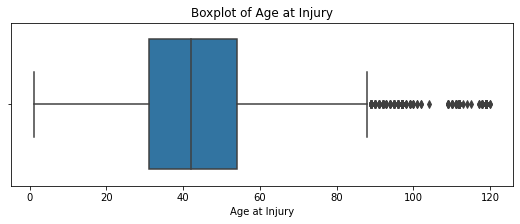

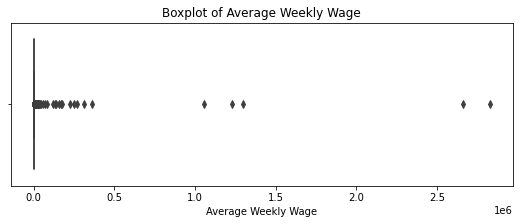

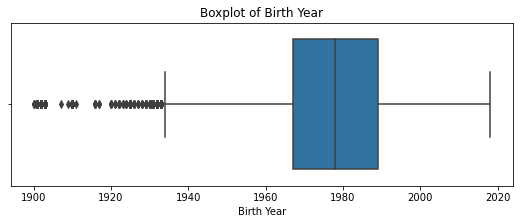

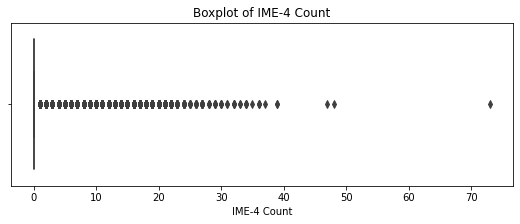

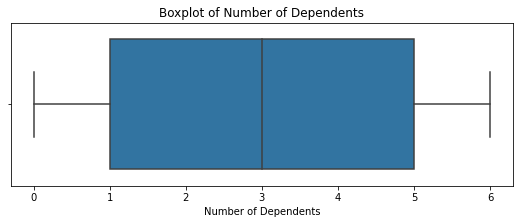

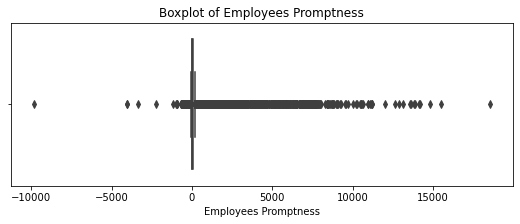

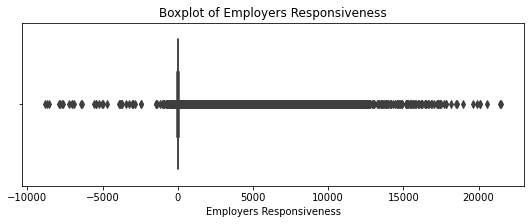

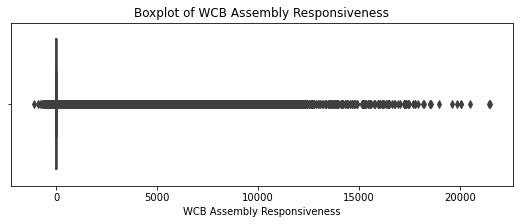

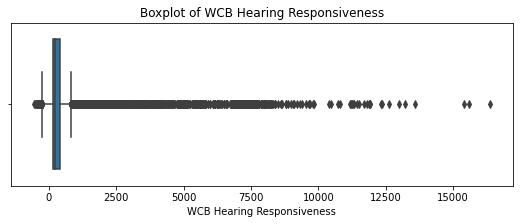

In [57]:
for var in numerical:
    fig, (ax1) = plt.subplots(1, figsize=(9, 3))
    sns.boxplot(ax=ax1, x=numerical[var])
    ax1.set_title(f"Boxplot of {var}")
    plt.show()
    

## Categorical Encoding

In [58]:
#Count encoding for Carrier Name and County of Injury
carrier_counts = df['Carrier Name'].value_counts()
carrier_counts_dict = carrier_counts.to_dict()
df['Carrier Name'] = df['Carrier Name'].map(carrier_counts_dict)
county_counts = df['County of Injury'].value_counts()
county_counts_dict = county_counts.to_dict()
df['County of Injury'] = df['County of Injury'].map(county_counts_dict)

In [59]:
df['Alternative Dispute Resolution'].value_counts()

N    571412
Y      2609
U         5
Name: Alternative Dispute Resolution, dtype: int64

In [60]:
df['Alternative Dispute Resolution'].mode()

0    N
dtype: object

In [61]:
#Binary encoding for WCB Decision, COVID-19 Indicator, Attorney/Representative, Alternative Dispute Resolution
df['WCB Decision'] = df['WCB Decision'].fillna('Work Related')
df['WCB Decision'] = df['WCB Decision'].map({'Not Work Related': 0, 'Work Related': 1})
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].map({'Y': 1, 'N': 0})
df['Attorney/Representative'] = df['Attorney/Representative'].map({'Y': 1, 'N': 0})
df['Alternative Dispute Resolution'] = df['Alternative Dispute Resolution'].map({'Y': 1, 'N': 0, 'U': 0})

In [62]:
#One-hot encoding for Carrier Type, District Name, Medical Fee Region, Gender and  Claim Injury Type 
df = pd.get_dummies(df, columns=['Carrier Type'], drop_first=True)
df = pd.get_dummies(df, columns=['District Name'], drop_first=True)
df = pd.get_dummies(df, columns=['Medical Fee Region'], drop_first=True)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [63]:
#Label encoding for Age Group and IME Classification

age_group_mapping = {'Under 25': 0,'Between 25 and 44': 1,'Between 45 and 64': 2,'65 and above': 3}
df['Age Group'] = df['Age Group'].map(age_group_mapping)
IME_mapping = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}
df['IME Classification'] = df['IME Classification'].map(IME_mapping)
injury_type_mapping = {'1. CANCELLED': 0, '2. NON-COMP':1, '3. MED ONLY':2,'4. TEMPORARY':3, '5. PPD SCH LOSS':4, '6. PPD NSL':5, '7. PTD':6, '8. DEATH':7}
df['Claim Injury Type'] = df['Claim Injury Type'].map(injury_type_mapping)

In [64]:
to_drop = ['Claim Identifier', 'Zip Code','Industry Code Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'] #removi as descriptions porque ja temos os codigos delas noutras colunas e removi o zip e identifier porque são coisas isoladas que não fornecem nenhuma informação sobre a pessoa

In [65]:
df = df.drop(to_drop, axis=1)

In [66]:
#não sei como abordar as datas nem os codes 

## Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [68]:
numerical_minmax = numerical.copy()
numerical_standard = numerical.copy()
numerical_robust = numerical.copy()

scaler_minmax = MinMaxScaler()
numerical_minmax = pd.DataFrame(scaler_minmax.fit_transform(numerical_minmax), columns=numerical.columns)

scaler_standard = StandardScaler()
numerical_standard = pd.DataFrame(scaler_standard.fit_transform(numerical_standard), columns=numerical.columns)

scaler_robust = RobustScaler()
numerical_robust = pd.DataFrame(scaler_robust.fit_transform(numerical_robust), columns=numerical.columns)